In [17]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [18]:
total_dep_score = pd.read_csv('../data/0&1/sum_targets.csv')

X_t = total_dep_score.copy()
del X_t['dep_score']
del X_t['dep_thoughts']
del X_t['has_dep_diag']
del X_t['prim_diag']
del X_t['secd_diag']
del X_t['total']


y_t = total_dep_score['total']

In [19]:
y_t.value_counts() 

1.0    523
2.0    288
5.0    218
3.0    155
4.0     70
Name: total, dtype: int64

In [28]:
523 / (523 + 288 + 218 + 155 + 70)

0.41706539074960125

In [20]:
X_t

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend
0,1,2,1,1,1,2
1,2,2,3,3,1,2
2,1,0,1,2,1,1
3,2,3,3,3,2,3
4,2,3,1,1,2,1
...,...,...,...,...,...,...
1249,2,2,2,2,2,1
1250,3,3,1,1,1,2
1251,3,0,2,2,2,2
1252,2,3,1,1,1,2


In [21]:
y_t

0       1.0
1       3.0
2       5.0
3       4.0
4       2.0
       ... 
1249    1.0
1250    1.0
1251    1.0
1252    1.0
1253    5.0
Name: total, Length: 1254, dtype: float64

In [22]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# 1. total

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=1)  # 70% training and 30% test

## SVM

In [24]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [25]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 1.0, 'gamma': 0.1, 'kernel': 'poly'}


In [27]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.44297082228116713
F1 score micro: 0.44297082228116713

classification report:
               precision    recall  f1-score   support

         1.0       0.44      1.00      0.61       167
         2.0       0.00      0.00      0.00        84
         3.0       0.00      0.00      0.00        38
         4.0       0.00      0.00      0.00        21
         5.0       0.00      0.00      0.00        67

    accuracy                           0.44       377
   macro avg       0.09      0.20      0.12       377
weighted avg       0.20      0.44      0.27       377



/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


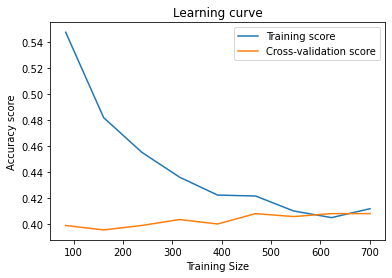

In [29]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='poly', C=1.0, gamma=0.1)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Logistic Regression

In [30]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [31]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


/home/jhpark/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.40594156        nan 0.40594156 0.40594156
 0.40594156 0.40594156 0.40594156 0.40594156        nan        nan
        nan        nan        nan 0.40593506 0.40593506        nan
 0.40593506 0.40593506        nan        nan 0.40594156        nan
 0.40594156 0.40594156 0.40594156 0.40594156 0.40594156 0.40594156
        nan        nan        nan        nan        nan 0.4047987
 0.4047987         nan 0.4047987  0.4047987         nan        nan
        nan        nan 0.40594156 0.40594156 0.40594156        nan
 0.40594156 0.40594156        nan        nan        nan        nan
        nan 0.40593506 0.40593506        nan 0.40593506 0.40593506
        nan        nan 0.40594156        nan 0.40594156 0.40594156
 0.40594156 0.40594156 0.40594156 0.40594156        nan        nan
        nan        nan        nan 0.40593506 0.40

In [32]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.44297082228116713
F1 score micro: 0.44297082228116713

classification report:
               precision    recall  f1-score   support

         1.0       0.44      1.00      0.61       167
         2.0       0.00      0.00      0.00        84
         3.0       0.00      0.00      0.00        38
         4.0       0.00      0.00      0.00        21
         5.0       0.00      0.00      0.00        67

    accuracy                           0.44       377
   macro avg       0.09      0.20      0.12       377
weighted avg       0.20      0.44      0.27       377



/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


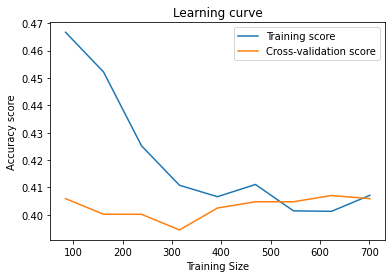

In [33]:
# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='liblinear')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## KNN

In [34]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [35]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'weights': 'uniform'}


In [36]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.33156498673740054
F1 score micro: 0.33156498673740054

classification report:
               precision    recall  f1-score   support

         1.0       0.42      0.65      0.51       167
         2.0       0.20      0.13      0.16        84
         3.0       0.03      0.03      0.03        38
         4.0       0.00      0.00      0.00        21
         5.0       0.18      0.07      0.11        67

    accuracy                           0.33       377
   macro avg       0.16      0.18      0.16       377
weighted avg       0.26      0.33      0.28       377



/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


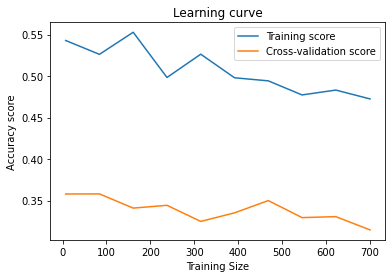

In [37]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Random Forest

In [38]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [39]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 50}


In [40]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.4403183023872679
F1 score micro: 0.4403183023872679

classification report:
               precision    recall  f1-score   support

         1.0       0.44      0.99      0.61       167
         2.0       0.33      0.01      0.02        84
         3.0       0.00      0.00      0.00        38
         4.0       0.00      0.00      0.00        21
         5.0       0.00      0.00      0.00        67

    accuracy                           0.44       377
   macro avg       0.15      0.20      0.13       377
weighted avg       0.27      0.44      0.28       377



/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jhpark/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished


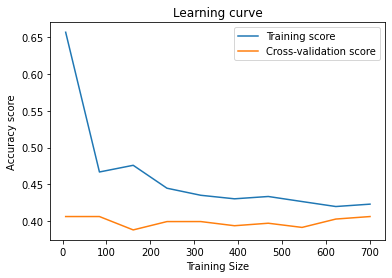

In [41]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=50, n_estimators=50)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [27]:
# Total Learning Curve

[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.2s remaining:    0.2s


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


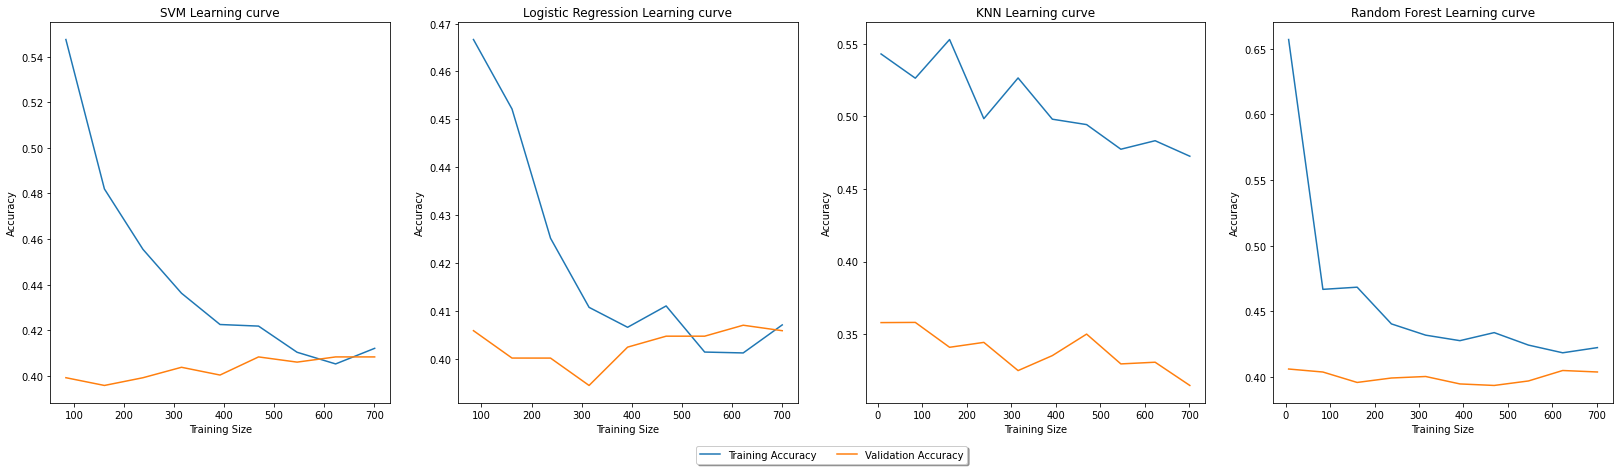

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

# SVM
plot_model = svm.SVC(kernel='poly', C=1.0, gamma=0.1)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='liblinear')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform')

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=50, n_estimators=50)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)

# 2. sampled

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)  # 70% training and 30% test

# SVM 

In [30]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [31]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 1.0, 'gamma': 0.0001, 'kernel': 'linear'}


In [32]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.5309278350515464
F1 score micro: 0.5309278350515464
F1 score binary: 0.5517241379310344

classification report:
               precision    recall  f1-score   support

         0.0       0.53      0.49      0.51        96
         1.0       0.53      0.57      0.55        98

    accuracy                           0.53       194
   macro avg       0.53      0.53      0.53       194
weighted avg       0.53      0.53      0.53       194



[learning_curve] Training set sizes: [  3  43  82 122 162 201 241 280 320 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


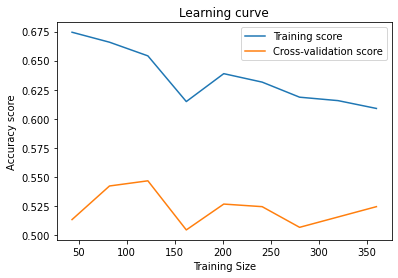

In [33]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='rbf', C=1.0, gamma=0.1)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Logistic Regression

In [34]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [35]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 1.0, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.50222222        nan 0.46222222 0.46222222
 0.46222222 0.46666667 0.46222222 0.46222222        nan        nan
        nan        nan        nan 0.52888889 0.52888889        nan
 0.52888889 0.52888889        nan        nan 0.50222222        nan
 0.46222222 0.46222222 0.46222222 0.46666667 0.46222222 0.46222222
        nan        nan        nan        nan        nan 0.52888889
 0.52888889        nan 0.52888889 0.52888889        nan        nan
        nan        nan 0.46222222 0.46222222 0.46222222        nan
 0.46222222 0.46222222        nan        nan        nan        nan
        nan 0.52888889 0.52888889        nan 0.52888889 0.52888889
        nan        nan 0.50222222        nan 0.46222222 0.47111111
 0.47111111 0.47777778 0.47111111 0.47111111        nan        nan
        nan        n

In [36]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.5309278350515464
F1 score micro: 0.5309278350515464
F1 score binary: 0.5427135678391959

classification report:
               precision    recall  f1-score   support

         0.0       0.53      0.51      0.52        96
         1.0       0.53      0.55      0.54        98

    accuracy                           0.53       194
   macro avg       0.53      0.53      0.53       194
weighted avg       0.53      0.53      0.53       194



[learning_curve] Training set sizes: [  3  43  82 122 162 201 241 280 320 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


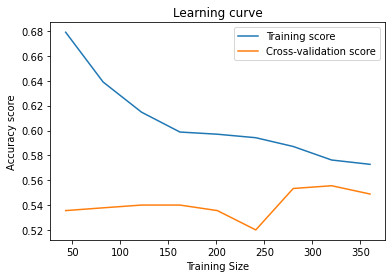

In [37]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=1.0, multi_class='auto', penalty='l2', solver='liblinear')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# KNN

In [38]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [39]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 12, 'weights': 'distance'}


In [40]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.4793814432989691
F1 score micro: 0.4793814432989691
F1 score binary: 0.30344827586206896

classification report:
               precision    recall  f1-score   support

         0.0       0.48      0.74      0.58        96
         1.0       0.47      0.22      0.30        98

    accuracy                           0.48       194
   macro avg       0.48      0.48      0.44       194
weighted avg       0.48      0.48      0.44       194



[learning_curve] Training set sizes: [  3  43  82 122 162 201 241 280 320 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


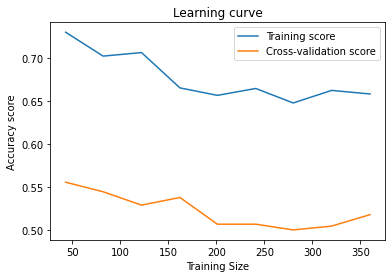

In [41]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=23, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Random Forest

In [42]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [43]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}


In [44]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.4948453608247423
F1 score micro: 0.4948453608247423
F1 score binary: 0.5288461538461539

classification report:
               precision    recall  f1-score   support

         0.0       0.49      0.43      0.46        96
         1.0       0.50      0.56      0.53        98

    accuracy                           0.49       194
   macro avg       0.49      0.49      0.49       194
weighted avg       0.49      0.49      0.49       194



[learning_curve] Training set sizes: [  3  43  82 122 162 201 241 280 320 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


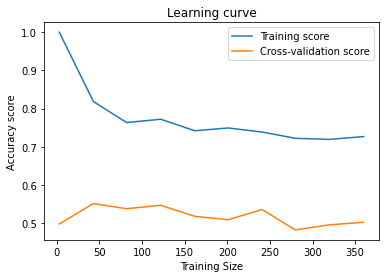

In [45]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=26, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=16)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Sampled Learning Curve

[learning_curve] Training set sizes: [  3  43  82 122 162 201 241 280 320 360]
[learning_curve] Training set sizes: [  3  43  82 122 162 201 241 280 320 360]
[learning_curve] Training set sizes: [  3  43  82 122 162 201 241 280 320 360]
[learning_curve] Training set sizes: [  3  43  82 122 162 201 241 280 320 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


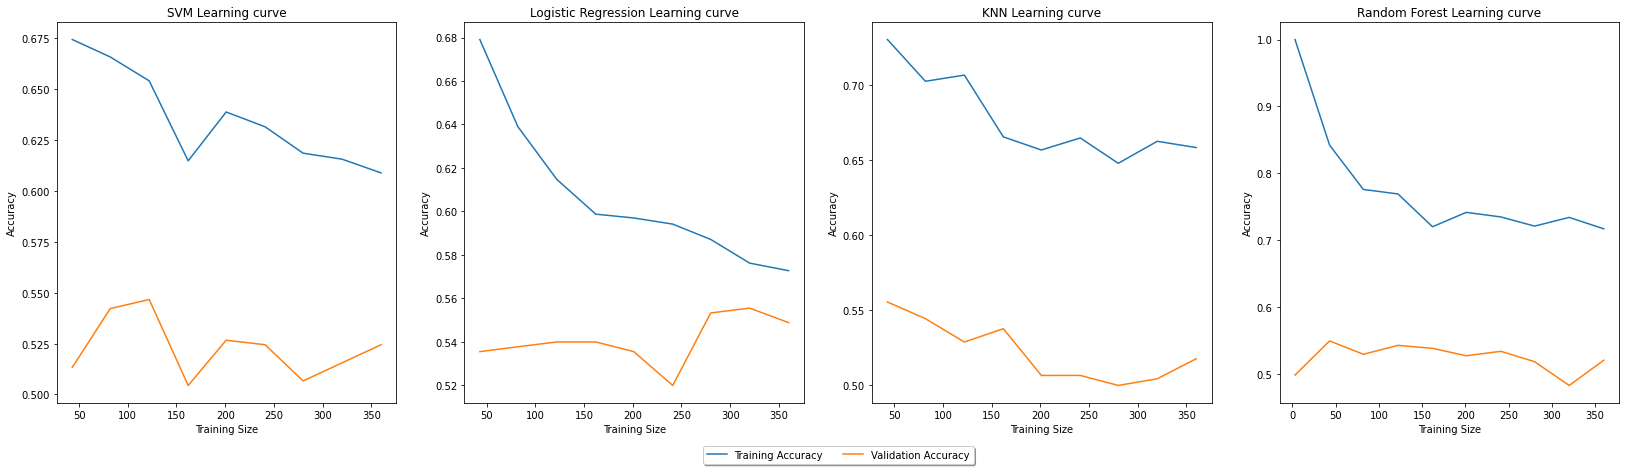

In [46]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

# SVM
plot_model = svm.SVC(kernel='rbf', C=1.0, gamma=0.1)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=1.0, multi_class='auto', penalty='l2', solver='liblinear')

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=23, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=26, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=16)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)